# Alumno: Gerardo de Miguel González

## Ejercicio de regularización

### Horner Gaussiano

 1. Escribe una función de R que reciba como input un vector "x" con la variable dependiente, un vector de parámetros "betas" que contenga los coeficientes de un polinomio y una sigma "sigma"; y que devuelva el vector dependiente que siga la ley polinomial dada con PDF gaussiana y sigma dada.  

In [1]:
#::GMG::Algoritmo de Horner vectorizado para hallar el valor de un polinomio
#       x: variable independiente
#       v: vector de coeficientes en x^0, x^1, ..., x^p
horner <- function(x, v) {
  Reduce(v, right=T, f=function(a, b) {
    b * x + a
  })
}

In [2]:
#::GMG::Función que genera el polinomio junto con un ruido distribuido
#       N(0,sigma)
pol <- function (x,betas,sigma) {
    return(horner(x,betas) + rnorm(length(x),0,sigma))
}

 2. Construye un vector de 40 elementos distribuido uniformemente entre [-3, 3]. Úsalo con la función anterior, el polinomio: $x^3 + 2 x^2 - x - 2$ y $\sigma = 4$. Representa los datos resultantes.

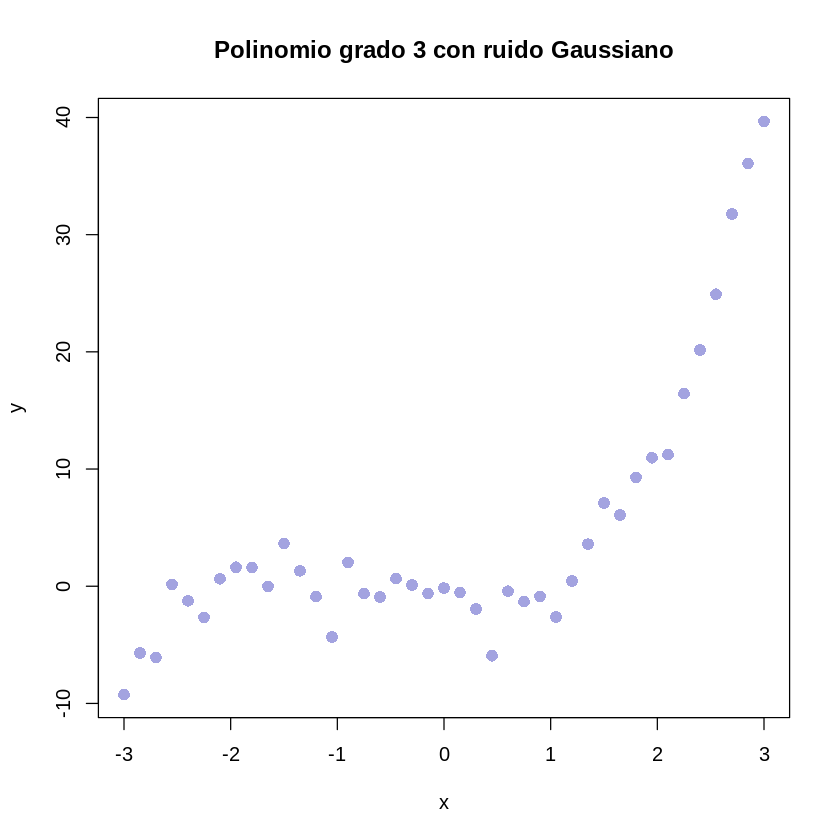

In [3]:
#::GMG::Nube de puntos del polinonio solicitado con el ruido gaussiano
set.seed(1)
x <- seq(from = -3, to = 3, by = .15)
beta <- c(-2,-1,2,1)
sigma <- 2
y <- pol(x,beta,sigma)
plot(x,y, 
     col=rgb(0.4,0.4,0.8,0.6),
     pch=16 ,cex=1.3, 
     main = 'Polinomio grado 3 con ruido Gaussiano')

 3. Calcula el valor mínimo de la función de coste (_loss_, RSS) para el caso en que hacemos un ajuste con una recta (dos parámetros), una parábola (tres parámetros), 4, 5, 6 y 7 parámetros, usando los primeros 20 puntos. Con los valores que hacen mínimo el RSS para la muestra de entrenamiento, calcula el RSS para los siguientes 20 puntos. Pinta los resultados en función del número de parámetros para ambos casos.

### Función de coste

In [4]:
#::GMG::Defino la función de coste (loss, rss)
#::nota::beta es el vector de coeficientes de regresión, i.e 
#        beta_0, beta_1, ... beta_p
#        x es la "matriz de diseño" (1,x)
rss <- function(betas,x,y) {
    betas.m <- as.matrix(betas)
    y.m <- as.matrix(y)
    X <- as.matrix(cbind(1,x))
    return (as.numeric(t(y.m - X %*% betas.m) %*% (y.m - X %*% betas.m)))
}

### Naïve Train/Test

In [5]:
#::GMG::Selecciono los "primeros 20 puntos" como "train"
x_train <- x[1:20]
y_train <- y[1:20]
x_test <- x[21:40]
y_test <- y[21:40]

### Regresión Matricial Recta (dos parámetros)

In [6]:
#::GMG::Hablamos primero de una regresión lineal con intercept y slope
#       La hago primero de forma "manual": calculo los dos parámetros
#::nota::caso recta, i.e polinomio de grado 1
X <- cbind(rep(1,20), x_train)
Y <- matrix(y_train, nrow=length(y_train))
b_hat <- solve(t(X)%*%X)%*%t(X)%*%Y
b_0_hat <- b_hat[1,1]
b_1_hat <- b_hat[2,1]
p_lm <- c(b_0_hat,b_1_hat)
names(p_lm) <- c('intercept','x_train')
print(p_lm)

intercept   x_train 
 1.762206  1.771767 


In [7]:
paste('rss:', round(rss(betas = p_lm, x = x_train, y = y_train),2))

[1] "rss: 141.79"

### Regresión Matricial Polinomial (n parámetros)

In [8]:
#::GMG::Calculo la función que resuelve 'least squares' las betas de forma matricial
betas <- function(x,y) {
    X <- cbind(1,x)
    Y <- as.matrix(y)
    b <- t(solve(t(X) %*% X) %*% t(X) %*% Y)
    #colnames(b) <- c('intercept', 'slope')
    return (as.numeric(b))
}

In [9]:
#::GMG::Prueba de funionamiento
m <- betas(x = x_train, y = y_train)
print(round(m,2))

[1] 1.76 1.77


In [10]:
#::GMG::Me hago mi función de regresión lineal
mi_lm <- function(x,y) {
    coef <- betas(x = x,y = y)
    loss <- rss(betas = coef,x = x,y = y)
    list(coeficientes = coef, rss = loss)
}

In [11]:
#::GMG::Prueba de funcionamiento
mi_model <- mi_lm(x = x_train, y = y_train)
round(mi_model$coeficientes,2)
paste('rss:',round(mi_model$rss,2))

[1] 1.76 1.77

[1] "rss: 141.79"

In [12]:
#::GMG::Usamos la función poly() para construir los polinomios de regresión
#       i.e. x^1, x^2, ..., x^p de la matriz de diseño para los betas
# https://www.rdocumentation.org/packages/stats/versions/3.5.1/topics/poly
x_3 <- cbind(x_train^1,x_train^2,x_train^3)
head(x_3)

-3.00,9.0000,-27.00000
-2.85,8.1225,-23.14913
-2.70,7.2900,-19.68300
-2.55,6.5025,-16.58137
-2.40,5.7600,-13.82400
-2.25,5.0625,-11.39062


In [13]:
class(x_3)

[1] "matrix"

In [14]:
x_3_b <- poly(x_train, 3,raw = T)
head (x_3_b)

1,2,3
-3.00,9.0000,-27.00000
-2.85,8.1225,-23.14913
-2.70,7.2900,-19.68300
-2.55,6.5025,-16.58137
-2.40,5.7600,-13.82400
-2.25,5.0625,-11.39062


In [15]:
class(as.matrix(x_3_b))

[1] "poly"   "matrix"

In [16]:
mi_model_2 <- mi_lm(x = poly(x_train, 2,raw = T), y = y_train)

In [17]:
round(mi_model_2$coeficientes,2)
paste('rss:',round(mi_model_2$rss,2))

[1] -2.85 -6.61 -2.66

[1] "rss: 78.85"

### Regresión lm(), poly() e I()

In [18]:
#::GMG::La regresión lineal simple se puede hacer con lm()
model_1 <- lm(y_train~x_train)
print(round(model_1$coefficients,3))

(Intercept)     x_train 
      1.762       1.772 


In [19]:
#::GMG:: El valor de loss/rss lo puedo calcular aquí con los 'residuos' 
#        que proporciona el objeto model_1
paste('rss:',round(sum(model_1$residuals^2),2),
      '(', round(rss(betas = model_1$coefficients, x = x_train, y = y_train),2), ')')

[1] "rss: 141.79 ( 141.79 )"

In [20]:
#::GMG::para el caso polinomial se puede usar lm() e I()
# https://www.rdocumentation.org/packages/base/versions/3.5.1/topics/AsIs
model_2 <- lm(y_train~x_train + I(x_train^2))
print(round(model_2$coef,2))
paste('rss:',round(sum(model_2$residuals^2),2) ,
      '(', round(rss(betas = model_2$coefficients, 
                     x = cbind(x_train, x_train^2), 
                     y = y_train),2), ')'
)

 (Intercept)      x_train I(x_train^2) 
       -2.85        -6.61        -2.66 


[1] "rss: 78.85 ( 78.85 )"

In [21]:
#::GMG::Que es equivalente, usando lm() e poly()
# https://www.rdocumentation.org/packages/stats/versions/3.5.1/topics/poly
model_2_b <- lm(y_train~poly(x_train, 2,raw = T))
print(round(as.vector(t(model_2_b$coef)),2))
paste('rss:',round(sum(model_2_b$residuals^2),2) ,
      '(', round(rss(betas = model_2_b$coefficients, 
                     x = cbind(x_train, x_train^2), 
                     y = y_train),2), ')'
)

[1] -2.85 -6.61 -2.66


[1] "rss: 78.85 ( 78.85 )"

### Resultados

In [22]:
#::GMG::Usando lm(), poly() y residuals calculo y pinto los rss
#       con polinomios de grado 2 a 7 para los 20 puntos de train
# https://stackoverflow.com/questions/13444524/populating-a-list-with-lm-objects
model <- list()
loss <- c()
#for (i in 1:7) {
#    model[[i]] <- lm(y_train~poly(x_train, i,raw = T)) 
#    loss[i] <- sum(model[[i]]$residuals^2)
#}
for (i in 1:7) {
    model[[i]] <- lm(y_train~poly(x_train, i,raw = T)) 
    loss[i] <- rss(betas = model[[i]]$coefficients, 
                   x = poly(x = x_train,degree = i, raw = T), 
                   y = y_train)
}

In [23]:
model[[1]]


Call:
lm(formula = y_train ~ poly(x_train, i, raw = T))

Coefficients:
              (Intercept)  poly(x_train, i, raw = T)  
                    1.762                      1.772  


In [24]:
loss

[1] 141.79288  78.84735  55.29173  55.24674  54.00843  50.08169  50.05928

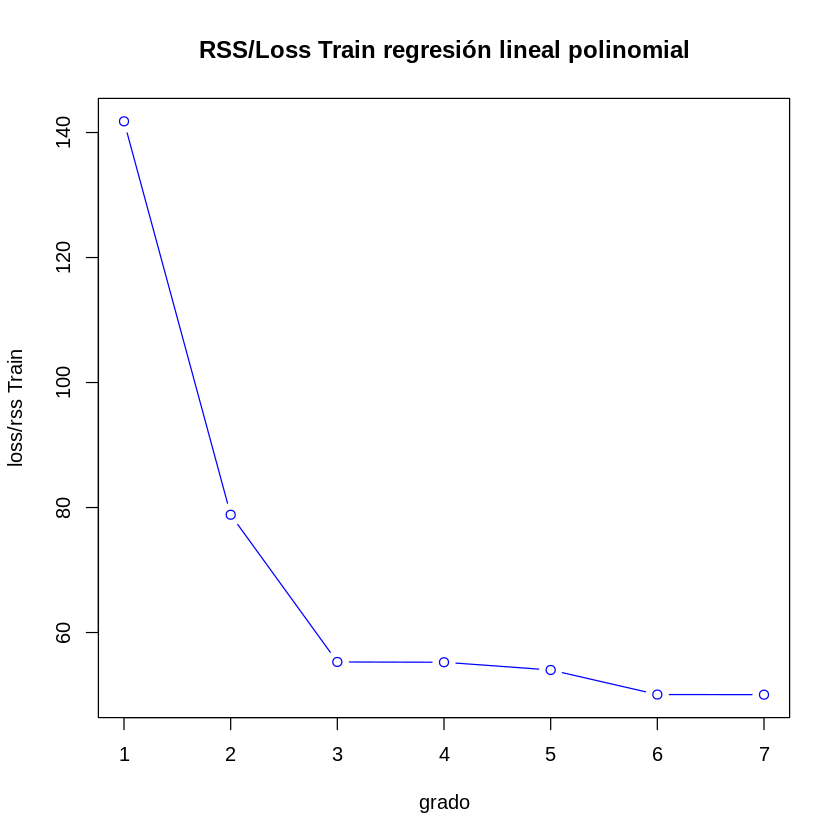

In [25]:
#::GMG::Dibujo la evolución de rss en función del grado
plot(1:7,loss, type = 'b', col = 'blue', 
     xlab = 'grado', ylab = 'loss/rss Train', 
     main = 'RSS/Loss Train regresión lineal polinomial')

In [27]:
#::GMG::Hago la predicción para los puntos de test
loss_pred <- c()
pred <- list()
for (i in 1:7) {
    pred[[i]] <- predict(model[[i]], newdata = data.frame(x_test,y_test))
    loss_pred[i] <- rss(betas = model[[i]]$coefficients, 
                        x = poly(x = x_test,degree = i, raw = T), 
                        y = y_test)
}

In [28]:
loss_pred

[1] 2.446745e+03 2.689186e+04 4.279114e+04 1.546414e+04 5.171601e+06
[6] 6.824179e+08 2.480005e+08

In [29]:
# https://stackoverflow.com/questions/47890742/logarithmic-scale-plot-in-r
log10Tck <- function(side, type){
   lim <- switch(side, 
     x = par('usr')[1:2],
     y = par('usr')[3:4],
     stop("side argument must be 'x' or 'y'"))
   at <- floor(lim[1]) : ceiling(lim[2])
   return(switch(type, 
     minor = outer(1:9, 10^(min(at):max(at))),
     major = 10^at,
     stop("type argument must be 'major' or 'minor'")
   ))
}

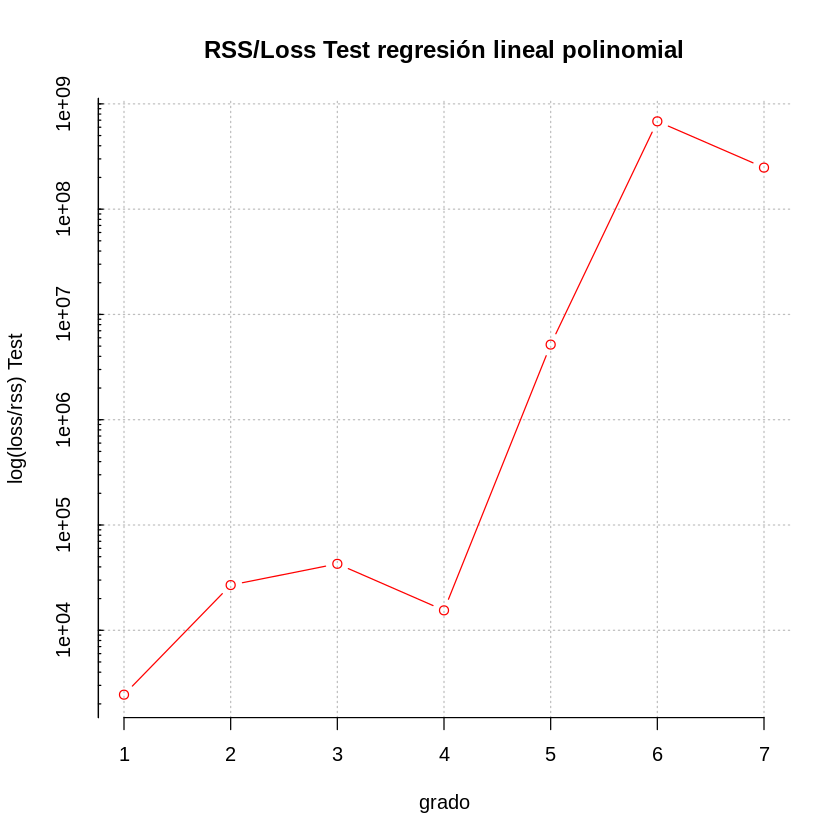

In [30]:
#::GMG::Dibujo la evolución de rss en función del grado
# https://stackoverflow.com/questions/47890742/logarithmic-scale-plot-in-r
# http://www.sthda.com/english/wiki/axis-scale-in-r-software-minimum-maximum-and-log-scale
# https://stat.ethz.ch/pipermail/r-help/2010-March/232593.html
plot(1:7,loss_pred, log='y', axes = F,
     type = 'b', col = 'red', 
     xlab = 'grado', ylab = 'log(loss/rss) Test',
     panel.first=abline(v=c(1,2,3,4,5,6,7),
                        h=c(1e+04,1e+05,1e+06,1e+07,1e+08,1e+09), 
                        lty=3,
                        col="gray"),
     main = 'RSS/Loss Test regresión lineal polinomial')
axis(1) # normal x axis
axis(2, at=log10Tck('y','major'), tcl= 0.2)
axis(2, at=log10Tck('y','minor'), tcl= 0.1, labels=NA)

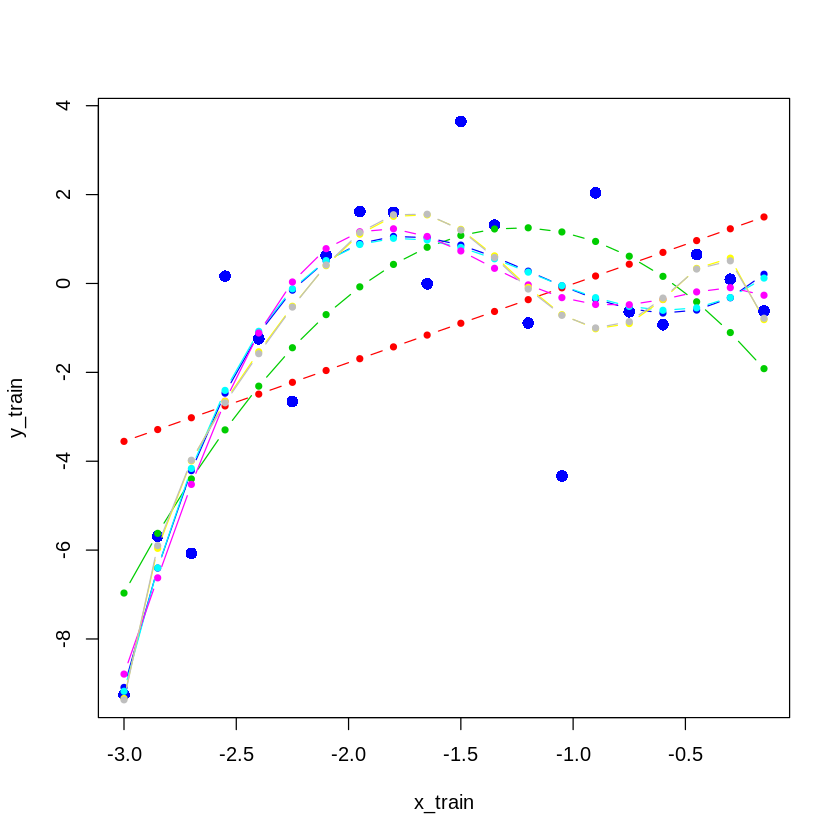

In [31]:
# ::GMG::Pintamos los resultados 
#::nota::las gráficas confirman los números :)
plot(x_train,y_train, pch = 16, cex = 1.3, col = "blue")
for (i in 1:7) {
  points(x_train, fitted(model[[i]]), col=i+1, pch=20, type='b')
}

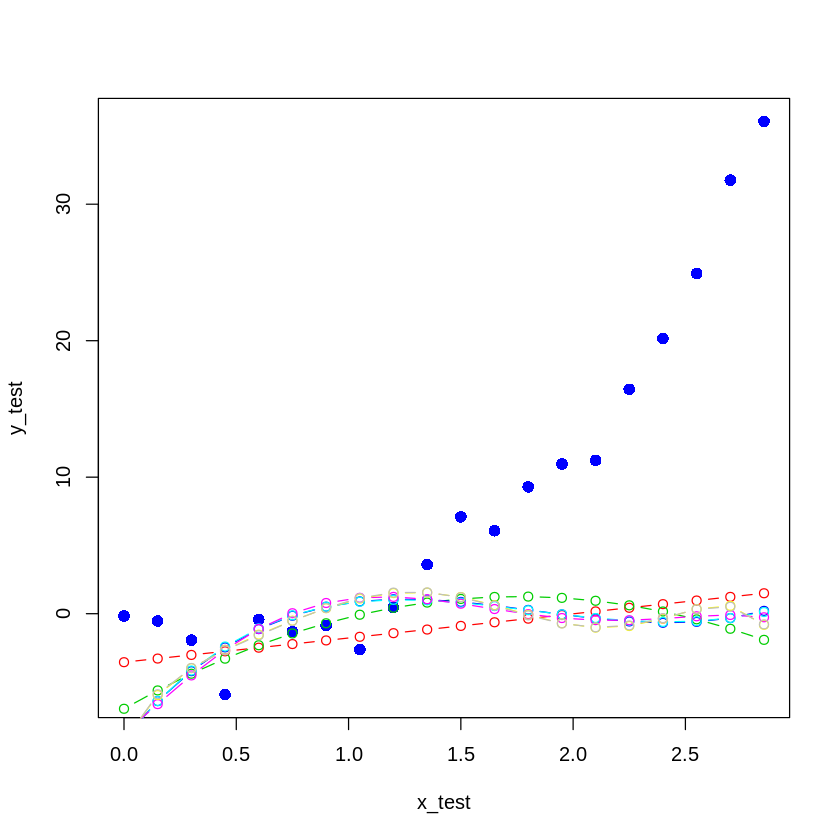

In [32]:
plot(x_test,y_test, pch = 16, cex = 1.3, col = "blue")
for (i in 1:7) {
  points(x_test, pred[[i]], col=i+1, type = 'b')
}

 4. Escribe una función de R que encuentre el mínimo de la función de coste para el caso de regularización L2. El parámetro lambda será pasado como input. Utilízala para estimar las curvas que mejor ajustan para el caso de (4 parámetros, lambda = 0), (7 parámetros, lambda=0) y (7 parámetros, lambda=1000). Pinta todas las curvas juntas y escribe tus conclusiones. 

5. Utiliza la función anterior para representar el valor de los parámetros del modelo en función de $\lambda$. Prueba a representar la evolución de los coeficientes de un modelo de 11 parámetros.